In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
work_dir = '/content/drive/My Drive/Projects/Titanic Competition'
os.chdir(work_dir)

## **Importing the data**

---



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

print('data_train \n\n', data_train.head(),'\n')
print('data_test \n\n', data_test.head(),'\n')

data_train 

    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN

#**EDA & Data Wrangling/basic feature engineering**

---



### **Exploration and completion of training data**

#### Basic information and statistics

In [ ]:
print('Statistics - training data:\n', data_train.describe(), '\n\n')
print('Missing values - training data:\n', data_train.isnull().sum().sort_values(ascending=False), '\n\n')
print('Info - training data\n', data_train.info())

Statistics - training data:
        PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200   


Missing values - training data:
 Cabin          6

**There is need to**:
1. Change the data type
2. Fill in the gaps
3. Transformation of some variables

#### Data types changes

For categorical data, the type was changed to 'category', and for data with unique values, to 'object'. <br>
* 'PassengerId','Survived', 'Pclass', 'Name', 'Sex', 'Embarked' - categorical variables
* 'Name', 'PassangerId', 'Ticket' and 'Cabin' have the unique values
* 'Age', 'SibSp', 'Parch', 'Fare' - quantitative variables

In [ ]:
from pandas.api.types import CategoricalDtype
cat = CategoricalDtype()

data_train['Survived'] = data_train['Survived'].astype(cat)
data_train['Pclass'] = data_train['Pclass'].astype(cat)
data_train['Sex'] = data_train['Sex'].astype(cat)
data_train['Embarked'] = data_train['Embarked'].astype(cat)

data_train['PassengerId'] = data_train['PassengerId'].astype('str')

data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    object  
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    category
dtypes: category(4), float64(2), int64(2), object(4)
memory usage: 59.8+ KB


#### Supplementing missing data

**Supplementing missing data from the Age column**

In [ ]:
print('Number of missing data:', data_train.isnull().sum()['Age'])
print('Percent of missing data:',
      round(data_train.isnull().sum()['Age']/len(data_train['PassengerId'])*100, 2),
      '%')

Number of missing data: 177
Percent of missing data: 19.87 %



There were 177 missing values in the 'Age' column of the training data, which is approximately 20% of all observations. <br><br>
Missing values were replace with the average values ​​for the 10-year age categories.
Assignment was done randomly, and the missing values were replaced with the average value from a specific age category depended on the share of people in that category in the data without missing items.


In [ ]:
# division into missing and non-missing data
data_train_only_nulls = data_train[data_train['Age'].isnull()].reset_index()
data_train_without_nulls = data_train.dropna(subset='Age')

# grouping by decade
bins = [0,10,20,30,40,50,60,70,85]
labels = ['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80']
data_train['AgeGroup'] = pd.cut(data_train['Age'], bins=bins, labels=labels, right=False)

# number of rows in each group
numbers = list(data_train.groupby('AgeGroup').count()['PassengerId'])
print(numbers)

[62, 102, 220, 167, 89, 48, 19, 7]


In [ ]:
# counting how many people should be added to 'Age nulls'

# percentage of people in groups
numbers_percent = []
for i in numbers:
  numbers_percent.append(round(((i / data_train_without_nulls.count()['PassengerId']) * 100)))
print('Percentage of people from each gropup:', numbers_percent)
print(sum(numbers_percent))

# number of people to add
people_add = []
for i in numbers_percent:
  people_add.append(round((i / 100) * data_train_only_nulls.count()['PassengerId'], 2))
print('The number of people to add to each gropup:', people_add)
print(sum(people_add))

# the idex number from which we start adding people from this category
start_index_people_add = []
a = 0
for i in people_add:
  start_index_people_add.append(a)
  a=a+i
print(start_index_people_add)

Percentage of people from each gropup: [9, 14, 31, 23, 12, 7, 3, 1]
100
The number of people to add to each gropup: [15.93, 24.78, 54.87, 40.71, 21.24, 12.39, 5.31, 1.77]
177.00000000000003
[0, 15.93, 40.71, 95.58, 136.29, 157.53, 169.92000000000002, 175.23000000000002]


In [ ]:
# complemet of 'Age'
data_train_only_nulls.loc[0:15,'Age'] = 5
data_train_only_nulls.loc[16:40,'Age'] = 15
data_train_only_nulls.loc[41:95,'Age'] = 25
data_train_only_nulls.loc[96:135,'Age'] = 35
data_train_only_nulls.loc[136:157,'Age'] = 45
data_train_only_nulls.loc[158:169,'Age'] = 55
data_train_only_nulls.loc[170:174,'Age'] = 65
data_train_only_nulls.loc[175:,'Age'] = 75

# we add rows with filled gaps
data_train = data_train_without_nulls.append(data_train_only_nulls)
data_train = data_train.drop(columns='index')

# division into groups
data_train['AgeGroup'] = pd.cut(data_train['Age'], bins=bins, labels=labels, right=False)

print("Number of deficiencies in 'Age':", sum(data_train[data_train['Age'].isnull()]['Age']))

Number of deficiencies in 'Age': 0


<ipython-input-81-ebc530924131>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_train = data_train_without_nulls.append(data_train_only_nulls)


**Supplementing missing data from the Embarked column**

In [ ]:
print('Number of deficiencies', data_train.isnull().sum()['Embarked'])
print('Percentage of deficiencies:',
      round(data_train.isnull().sum()['Embarked']/len(data_train['PassengerId'])*100, 2),
      '%')

Number of deficiencies 2
Percentage of deficiencies: 0.22 %


Only 2 missing values were observed in the 'Embarked' column for the training data.<br><br>
It was decided to replace them with the most common value.

In [ ]:
data_train.groupby('Embarked').count()['PassengerId'].sort_values(ascending = False)

Embarked
S    644
C    168
Q     77
Name: PassengerId, dtype: int64

In [ ]:
# the most common value is 'S'
for i in data_train[data_train['Embarked'].isnull()].index:
  data_train.loc[i, 'Embarked'] = 'S'

print("Number of missing values in the 'Embarked' column:", sum(data_train[data_train['Embarked'].isnull()]['Embarked']))

Number of missing values in the 'Embarked' column: 0


#### Transformation of selected variables

**Transformation of Cabin variable**

In [ ]:
print('Number of missing data::', data_train.isnull().sum()['Cabin'])
print('Percentage of missing data::',
      round(data_train.isnull().sum()['Cabin']/len(data_train['PassengerId'])*100, 2),
      '%')

Number of missing data:: 687
Percentage of missing data:: 77.1 %


There are a lot of missing values ​​in the  'Cabin' variable.<br><br>

In order to be able to use it in further analysis, it was decided to transform this variable into a category, where 0 - a passenger without a specific cabin number, and 1 - with an indicated cabin number.

In [ ]:
data_train.loc[data_train['Cabin'].isnull(), 'Cabin_cat'] = 0
data_train.loc[data_train['Cabin'].notnull(), 'Cabin_cat'] = 1

data_train['Cabin_cat'] = data_train['Cabin_cat'].astype(cat)

# checking the first 5 observations
data_train[['Cabin','Cabin_cat']].head()

,Cabin,Cabin_cat
0,NaN,0.0
1,C85,1.0
2,NaN,0.0
3,C123,1.0
4,NaN,0.0


**The transformation of the variable SibSp**

In [ ]:
data_train.describe()['SibSp']

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

The basic descriptive statistics show that the vast majority of observations in the 'SibSp' variable are 0. The median is 0 and the upper quartile is 1. That means that at least 50% of passengers had no sibling or partner at all and 75% of passengers had maximum one. <br><br>
In order for this variable not to interfere with further analysis, it was also decided to transform it into 0-1, where 0 is a passenger without siblings or partner on board, and 1 - conversely.

In [ ]:
''' A function that based on the elements in the given object, creates a list from
values ​​0-1, where 0 means that the item was equal to 0, and 1 means that it was different
from 0.'''
def company_cat (data):
    cat = []
    for i in data:
        if i == 0: cat.append(0)
        else: cat.append(1)
    return cat

In [ ]:
data_train['SibSp_cat'] = company_cat(data_train['SibSp'])

data_train['SibSp_cat'] = data_train['SibSp_cat'].astype(cat)

# checking the first 5 observations
data_train[['SibSp','SibSp_cat']].head()

,SibSp,SibSp_cat
0,1,1
1,1,1
2,0,0
3,1,1
4,0,0


**Parch_cat transformation**

In [ ]:
data_train.describe()['Parch']

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64

Like the variable 'SibSp', the variable 'Parch_cat' has most observations with a value of 0 (upper quartile is -0)<br><br>
Therefore, as before, it was decided to convert it to 0-1, where 0 is a passenger without parents and a child on board, and 1 - conversely.

In [ ]:
data_train['Parch_cat'] = company_cat(data_train['Parch'])

data_train['Parch_cat'] = data_train['Parch_cat'].astype(cat)

# checking the first 5 observations
data_train[['Parch','Parch_cat']].head()

,Parch,Parch_cat
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


**Transformation of the Fare variable**

In [ ]:
# basic stats
print(data_train.describe()['Fare'], '\n')

# checking frequency of values

print(data_train["Fare"].value_counts())

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64 

8.0500      43
13.0000     42
7.8958      38
7.7500      34
26.0000     31
            ..
4.0125       1
211.5000     1
55.4417      1
75.2500      1
6.9500       1
Name: Fare, Length: 248, dtype: int64


In [ ]:
ZeroFares = data_train[data_train["Fare"] == 0.0]
ZeroFares.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 179 to 163
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  15 non-null     object  
 1   Survived     15 non-null     category
 2   Pclass       15 non-null     category
 3   Name         15 non-null     object  
 4   Sex          15 non-null     category
 5   Age          15 non-null     float64 
 6   SibSp        15 non-null     int64   
 7   Parch        15 non-null     int64   
 8   Ticket       15 non-null     object  
 9   Fare         15 non-null     float64 
 10  Cabin        3 non-null      object  
 11  Embarked     15 non-null     category
 12  AgeGroup     15 non-null     category
 13  Cabin_cat    15 non-null     category
 14  SibSp_cat    15 non-null     category
 15  Parch_cat    15 non-null     category
dtypes: category(8), float64(2), int64(2), object(4)
memory usage: 2.4+ KB


There are 15 passengers who sailed for free (or this data was not entered)

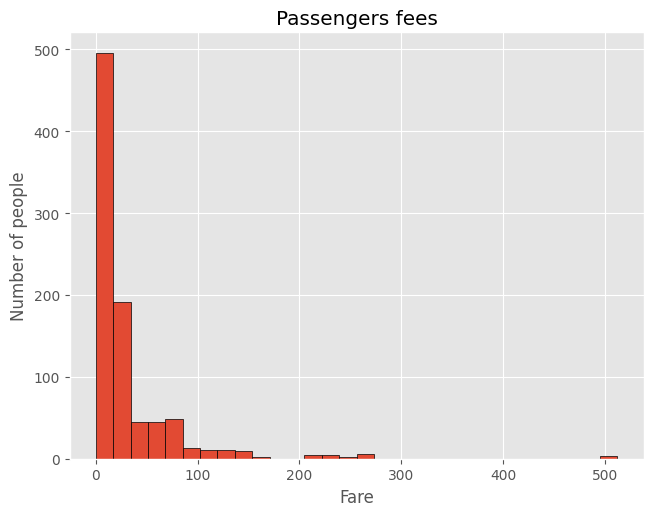

In [ ]:
plt.hist(data_train['Fare'],bins=30,edgecolor="black")
plt.style.use('ggplot')
plt.tight_layout()
plt.title('Passengers fees')
plt.xlabel('Fare')
plt.ylabel('Number of people')
plt.show()

The graph suggests the existence of outliers (check values ​​> 200).

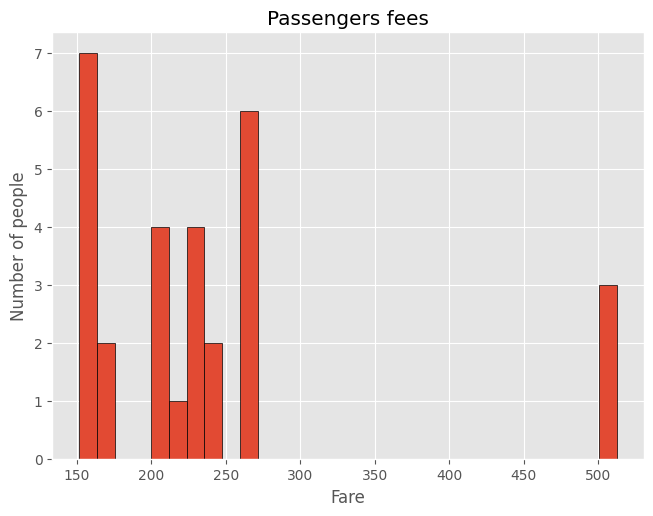

In [ ]:
MoreThan150Fare = data_train[data_train["Fare"] > 150.0]
plt.hist(MoreThan150Fare["Fare"],bins=30,edgecolor="black")
plt.style.use('ggplot')
plt.tight_layout()
plt.title('Passengers fees')
plt.xlabel('Fare')
plt.ylabel('Number of people')
plt.show()

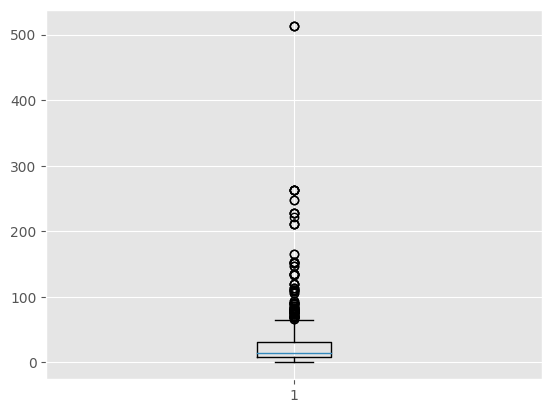

In [ ]:
for i in ['Fare']:
  plt.boxplot(data_train[i])
  plt.show()

The box plot suggests many more outliers. It was decided to remove such observations.

In [ ]:
from scipy import stats
data_train = data_train[(np.abs(stats.zscore(data_train['Fare'])) <3)]
data_train.describe()['Fare']

count    871.000000
mean      26.530170
std       29.351184
min        0.000000
25%        7.895800
50%       13.862500
75%       30.000000
max      164.866700
Name: Fare, dtype: float64

In [ ]:
# division into groups
bins = [0, 20, 50, 100, 175]
labels = ['0-20','20-50','50-100','100-175']
data_train['FareGroup'] = pd.cut(data_train['Fare'], bins=bins, labels=labels, right=False)

data_train[['Fare','FareGroup']].head()

<ipython-input-98-70e0fbcba6ac>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['FareGroup'] = pd.cut(data_train['Fare'], bins=bins, labels=labels, right=False)


,Fare,FareGroup
0,7.2500,0-20
1,71.2833,50-100
2,7.9250,0-20
3,53.1000,50-100
4,8.0500,0-20


### **Exploration and completion of test data**


#### Basic information and statistics

In [ ]:
print('Statistics - test data:\n', data_test.describe(), '\n\n')
print('Missing values - test data::\n', data_test.isnull().sum().sort_values(ascending=False), '\n\n')
print('Info - test data\n', data_test.info())

Statistics - test data:
        PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209    0.896760    0.981429   55.907576
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   21.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.454200
75%    1204.750000    3.000000   39.000000    1.000000    0.000000   31.500000
max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200 


Missing values - test data::
 Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64 


<class

#### Data types changes

In [ ]:
data_test['Pclass'] = data_test['Pclass'].astype(cat)
data_test['Sex'] = data_test['Sex'].astype(cat)
data_test['Embarked'] = data_test['Embarked'].astype(cat)

data_test['PassengerId'] = data_test['PassengerId'].astype('str')

data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    object  
 1   Pclass       418 non-null    category
 2   Name         418 non-null    object  
 3   Sex          418 non-null    category
 4   Age          332 non-null    float64 
 5   SibSp        418 non-null    int64   
 6   Parch        418 non-null    int64   
 7   Ticket       418 non-null    object  
 8   Fare         417 non-null    float64 
 9   Cabin        91 non-null     object  
 10  Embarked     418 non-null    category
dtypes: category(3), float64(2), int64(2), object(4)
memory usage: 27.9+ KB


#### Supplementing missing data

Missing data are filled basing on a data/stats from training data, because it is assumed that we cannot know this information for test data.
<br>
Filling in the gaps and trasition have to be done separately because the test data adds information that, in theory, we can't know about  yet.
This may result, for example, that in the fact that model testing will show inflated indicators, because the training data will contain information from the test data, and therefore will better match them.


**Supplementing missing data from the Age column**

In [ ]:
# division into missing and non-missing data
data_test_only_nulls = data_test[data_test['Age'].isnull()].reset_index()
data_test_without_nulls = data_test.dropna(subset='Age')

In [ ]:
# calculation how many people should be added to 'Age nulls'

# the share of age groups is determined on the test data
print('Percentage of people from each group:', numbers_percent)
print(sum(numbers_percent))

# number of people to add
people_add = []
for i in numbers_percent:
  people_add.append(round((i / 100) * data_test_only_nulls.count()['PassengerId'], 2))
print('The number of people to add to each group', people_add)
print(sum(people_add))

# the inex number from which we start adding people from this category
start_index_people_add = []
a = 0
for i in people_add:
  start_index_people_add.append(a)
  a=a+i
print(start_index_people_add)

Percentage of people from each group: [9, 14, 31, 23, 12, 7, 3, 1]
100
The number of people to add to each group [7.74, 12.04, 26.66, 19.78, 10.32, 6.02, 2.58, 0.86]
85.99999999999999
[0, 7.74, 19.78, 46.44, 66.22, 76.53999999999999, 82.55999999999999, 85.13999999999999]


In [ ]:
# assigning the average value to null
data_test_only_nulls.loc[0:7,'Age'] = 5
data_test_only_nulls.loc[8:19,'Age'] = 15
data_test_only_nulls.loc[20:45,'Age'] = 25
data_test_only_nulls.loc[46:65,'Age'] = 35
data_test_only_nulls.loc[66:76,'Age'] = 45
data_test_only_nulls.loc[77:82,'Age'] = 55
data_test_only_nulls.loc[83:84,'Age'] = 65
data_test_only_nulls.loc[85:,'Age'] = 75

# we add rows with filled gaps
data_test = data_test_without_nulls.append(data_test_only_nulls)
data_test = data_test.drop(columns=['index'])

print("Number of missing values in the 'Age' column:", sum(data_test[data_test['Age'].isnull()]['Age']))

Number of missing values in the 'Age' column: 0


<ipython-input-103-02e8c040f7a3>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_test = data_test_without_nulls.append(data_test_only_nulls)


**Supplementing missing data from the Fare column**

One missing observation in the Fare column was replaced by the median from the training data.
The median was chosen due to the very high asymmetry in the variable (large outliers distort the mean)

In [ ]:
data_test['Fare'].fillna(data_train['Fare'].median(), inplace=True)
print('Info - dane testowe\n', data_test.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 85
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    object  
 1   Pclass       418 non-null    category
 2   Name         418 non-null    object  
 3   Sex          418 non-null    category
 4   Age          418 non-null    float64 
 5   SibSp        418 non-null    int64   
 6   Parch        418 non-null    int64   
 7   Ticket       418 non-null    object  
 8   Fare         418 non-null    float64 
 9   Cabin        91 non-null     object  
 10  Embarked     418 non-null    category
dtypes: category(3), float64(2), int64(2), object(4)
memory usage: 31.0+ KB
Info - dane testowe
 None


#### Transformation of selected variables

The transformation of variables was performed in the same way as for the training data.

**Transformation of Cabin variable**

In [ ]:
# Transformation of 'Cabin' variable in test data
data_test.loc[data_test['Cabin'].isnull(), 'Cabin_cat'] = 0
data_test.loc[data_test['Cabin'].notnull(), 'Cabin_cat'] = 1

data_test['Cabin_cat'] = data_test['Cabin_cat'].astype(cat)

# checking the first 5 observations
data_test[['Cabin','Cabin_cat']].head()

,Cabin,Cabin_cat
0,NaN,0.0
1,NaN,0.0
2,NaN,0.0
3,NaN,0.0
4,NaN,0.0


**The transformation of the variable SibSp**

In [ ]:
data_test['SibSp_cat'] = company_cat(data_test['SibSp'])

data_test['SibSp_cat'] = data_test['SibSp_cat'].astype(cat)

# checking the first 5 observations
data_test[['SibSp','SibSp_cat']].head()

,SibSp,SibSp_cat
0,0,0
1,1,1
2,0,0
3,0,0
4,1,1


**Transformation of the Parch variable**

In [ ]:
data_test['Parch_cat'] = company_cat(data_test['Parch'])

data_test['Parch_cat'] = data_test['Parch_cat'].astype(cat)

# checking the first 5 observations
data_test[['Parch','Parch_cat']].head()

,Parch,Parch_cat
0,0,0
1,0,0
2,0,0
3,0,0
4,1,1


### Graphs of the variables

In [ ]:
# graphing function
def function_surv(x_label, y_label, groupby1, groupby2):

        plt.bar(data_train.groupby([groupby1]).count().index.astype('str'),
            data_train.groupby([groupby1])[groupby2].count(),
            color='red',
            edgecolor="black")

        plt.bar(data_train.groupby([groupby1]).count().index.astype('str'),
                data_train[data_train['Survived'] == 1].groupby([groupby1])[
                        groupby1].count(),
                color='green',
                edgecolor="black")

        plt.tight_layout()
        plt.xlabel(x_label)
        plt.ylabel(y_label)
        plt.legend(title=None, labels=["Not survived", "Survived"], facecolor='white')

In [ ]:
# a function that makes captions for charts with two and three bars
def text_proc_surv(var, number_of_bars):
    step = 0
    for i in data_train.groupby([var]).count().index:
        all_p = data_train.groupby([var])[var].count().loc[i]
        surv_p = data_train[data_train['Survived'] == 1].groupby([var])[
            var].count().loc[i]
        text = f'{round(surv_p/all_p*100,2)} % survived'

        if number_of_bars == 3:
            plt.text(step-0.35, data_train.groupby([var])
                    [var].count().loc[i]+10, text)
            step = step + 1
        else:
            plt.text(step-0.2, data_train.groupby([var])
                    [var].count().loc[i]+10, text)
            step = step + 1

####**Survived (cat.):**

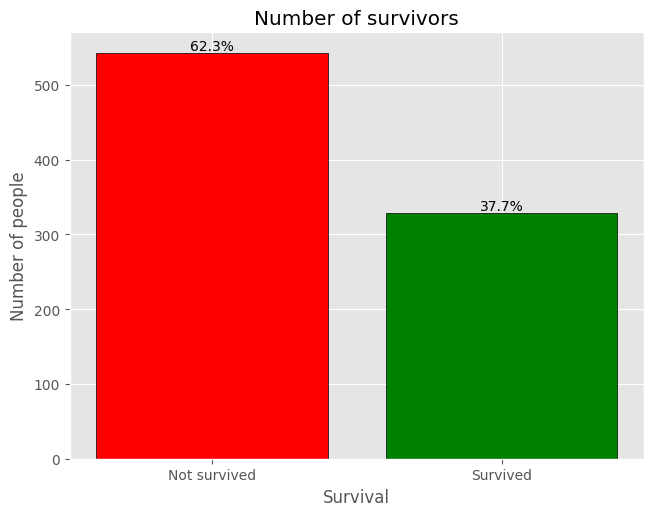

In [ ]:
plt.style.use('ggplot')
plt.bar(data_train['Survived'].value_counts().index,
        data_train['Survived'].value_counts(),
        color=['red', 'green'],
        edgecolor="black")
total = sum(data_train['Survived'].value_counts())
for i, v in enumerate(data_train['Survived'].value_counts()):
    percentage = '{:.1f}%'.format((v / total) * 100)
    plt.text(i, v, percentage, ha='center', va='bottom')
plt.tight_layout()
plt.xlabel("Survival")
plt.ylabel("Number of people")
plt.xticks(ticks=[0, 1], labels=['Not survived', 'Survived'])
plt.title("Number of survivors")
plt.show()

In [ ]:
print(data_train['Survived'].value_counts())

0    543
1    328
Name: Survived, dtype: int64


More than half of the passengers in the training dataset did not survive the crash. There were 871 people in total.

####**Pclass (cat.):**

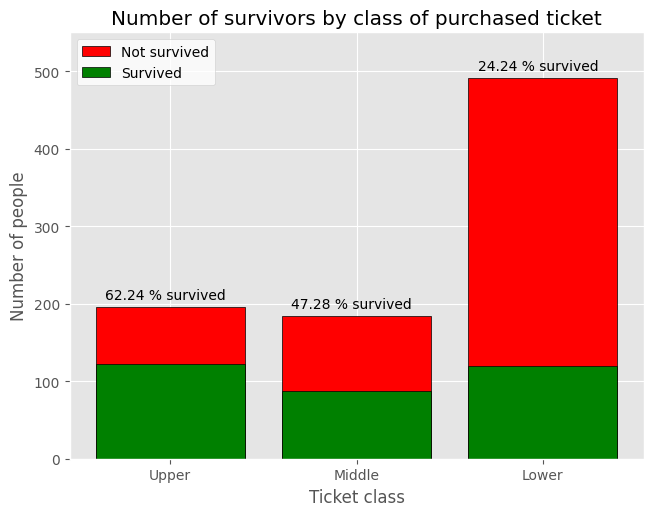

In [ ]:
function_surv("Ticket class", "Number of people", "Pclass", "Pclass")

plt.xticks(ticks=[0, 1, 2], labels=['Upper', 'Middle', 'Lower'])

text_proc_surv('Pclass', 3)

plt.ylim((0,550))
plt.title("Number of survivors by class of purchased ticket")
plt.show()

People in the lowest class had the least chance of survival. In the highest class, more than half of the passengers survived.

####**Sex (cat.):**

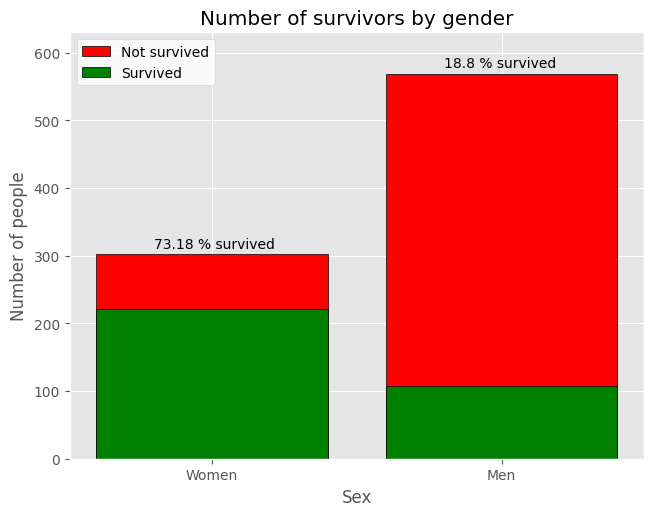

In [ ]:
function_surv("Sex", "Number of people", "Sex", "Sex")

plt.xticks(ticks=[0, 1], labels=['Women', 'Men'])

text_proc_surv('Sex', 2)

plt.ylim((0, 630))
plt.title("Number of survivors by gender")
plt.show()

In [ ]:
print(data_train['Sex'].value_counts())

male      569
female    302
Name: Sex, dtype: int64


Here we have a rather interesting layout. There were almost half as many men on the ship as women. However, women have a much higher survival rate.

####**Cabin (cat.):**

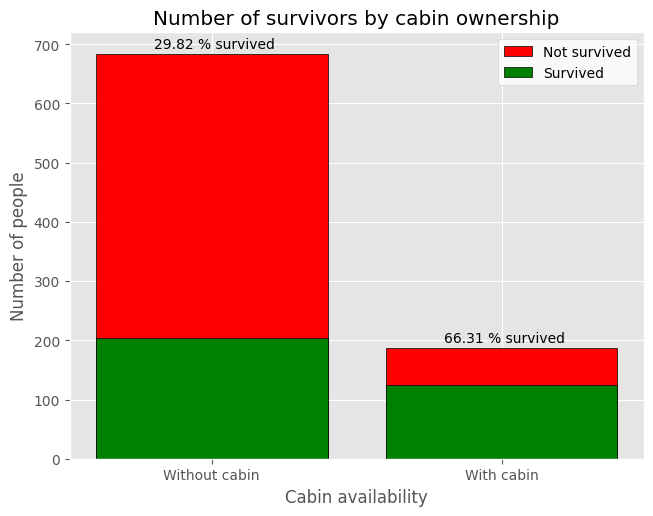

In [ ]:
function_surv("Cabin availability", "Number of people", "Cabin_cat", "Cabin_cat")

plt.xticks(ticks=[0, 1], labels=['Without cabin', 'With cabin'])

text_proc_surv('Cabin_cat', 2)

plt.ylim((0, 720))
plt.title("Number of survivors by cabin ownership")
plt.show()

For simplicity, we have qualified all NaN values to the 'without cabin' category. We can observe that among some passengers (with assigned cabin), more than half survived.

####**Embarked (cat.):**

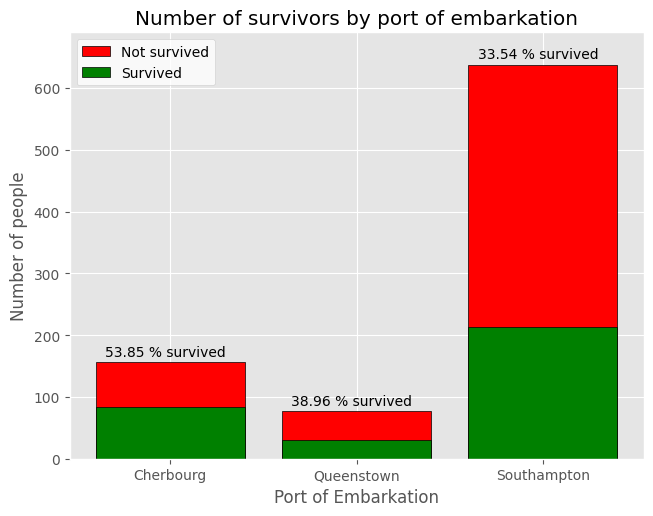

In [ ]:
function_surv("Port of Embarkation", "Number of people", "Embarked", "Embarked")

plt.xticks(ticks=[0, 1, 2], labels=['Cherbourg', 'Queenstown', 'Southampton'])

text_proc_surv('Embarked', 3)

plt.ylim((0, 690))
plt.title("Number of survivors by port of embarkation")
plt.show()

The largest number of people boarded the Titanic in the port of Southampton. The same port also has the lowest survival rate. Below, let's check how "Port of embarkation" is broken down by gender and class. These are the most important variables so far.

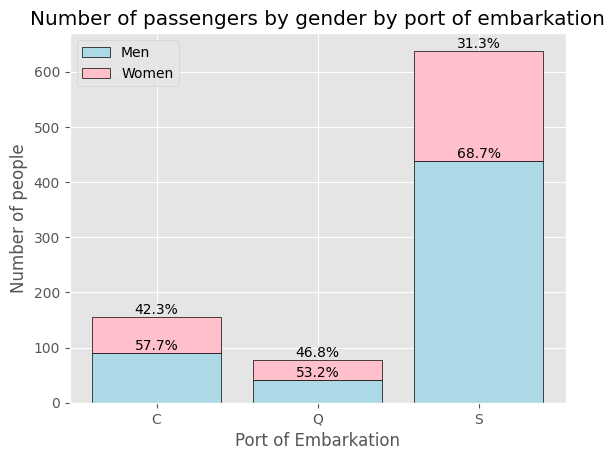

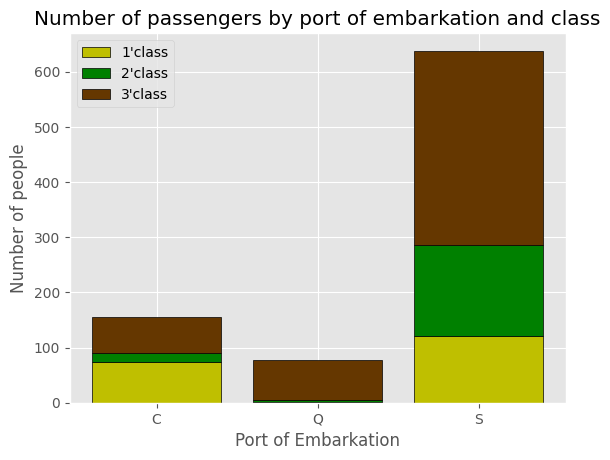

In [ ]:
port_labels = data_train.groupby(['Embarked']).count().index.astype('str')
male_counts = data_train[data_train['Sex'] == 'male'].groupby(['Embarked'])['Sex'].count()
female_counts = data_train[data_train['Sex'] == 'female'].groupby(['Embarked'])['Sex'].count()

plt.bar(port_labels, male_counts, label='Men', color='#ADD8E6', edgecolor="black")
plt.bar(port_labels, female_counts, bottom=male_counts, label='Women', color='#FFC0CB', edgecolor="black")


total_counts = male_counts + female_counts  # Suma liczby mężczyzn i kobiet dla każdego portu
for i, (male, female, total) in enumerate(zip(male_counts, female_counts, total_counts)):
    male_percentage = '{:.1f}%'.format((male / total) * 100)
    female_percentage = '{:.1f}%'.format((female / total) * 100)
    plt.text(i, male, male_percentage, ha='center', va='bottom', color='black')
    plt.text(i, male + female, female_percentage, ha='center', va='bottom', color='black')

plt.xlabel("Port of Embarkation")
plt.ylabel("Number of people")
plt.title('Number of passengers by gender by port of embarkation')
plt.legend()
plt.show()

port_labels = data_train.groupby(['Embarked']).count().index.astype('str')
Upper_class = data_train[data_train['Pclass'] == 1].groupby(['Embarked'])['Pclass'].count()
Middle_class = data_train[data_train['Pclass'] == 2].groupby(['Embarked'])['Pclass'].count()
Lower_class = data_train[data_train['Pclass'] == 3].groupby(['Embarked'])['Pclass'].count()
total_counts = Upper_class + Middle_class + Lower_class

plt.bar(port_labels, Upper_class, label='1\'class', color='y', edgecolor="black")
plt.bar(port_labels, Middle_class, bottom=Upper_class, label='2\'class', color='g', edgecolor="black")
plt.bar(port_labels, Lower_class, bottom=Upper_class+Middle_class, label='3\'class', color='#653700', edgecolor="black")

plt.xlabel("Port of Embarkation")
plt.ylabel("Number of people")
plt.title('Number of passengers by port of embarkation and class')
plt.legend()

plt.show()




Southampton has a higher proportion of males than other ports, which is possibly contributing to the survival rate.Classes also probably have some influence on the survival rate according to the port where these people boarded the ship. In Cherbourg, about half of the people are from the upper class. In Southampton, more than half of the people are from the lowest class.

####**SibSp (cat.):**

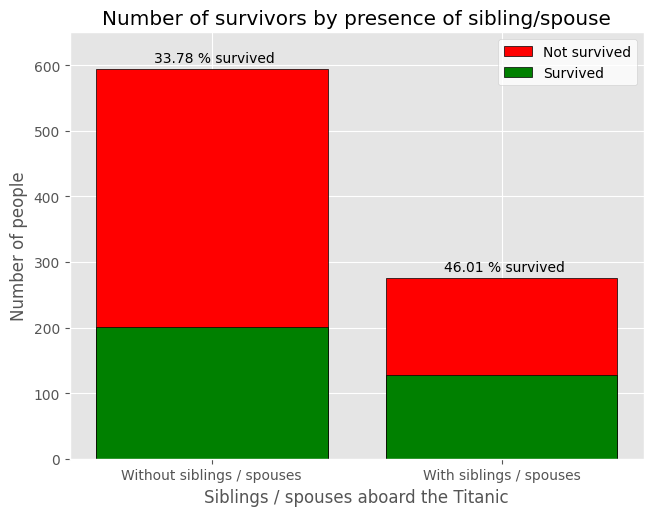

In [ ]:
function_surv("Siblings / spouses aboard the Titanic", "Number of people",
              "SibSp_cat", "SibSp_cat")

plt.xticks(ticks=[0, 1], labels=[
           'Without siblings / spouses', 'With siblings / spouses'])

text_proc_surv('SibSp_cat', 2)

plt.ylim((0, 650))
plt.title("Number of survivors by presence of sibling/spouse")
plt.show()

####**Parch (cat.)**

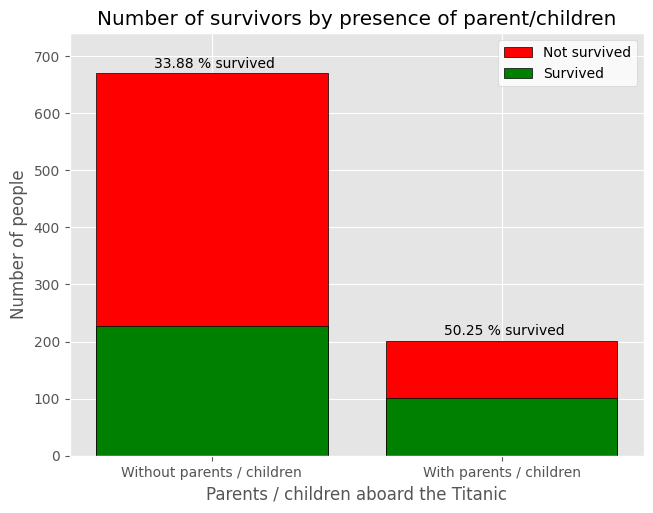

In [ ]:
function_surv("Parents / children aboard the Titanic", "Number of people",
              "Parch_cat", "Parch_cat")

plt.xticks(ticks=[0, 1], labels=[
           'Without parents / children', 'With parents / children'])

text_proc_surv('Parch_cat', 2)

plt.ylim((0, 740))
plt.title("Number of survivors by presence of parent/children")
plt.show()

For the SibSp and Parch variables, we have created 2 categories - With ParCh/SibSp and Without ParCh/SibSp. Passengers who brought their families with them have a better chance of survival than passengers traveling alone.

####**Age (il.):**

Graph showing survival in specific age groups:

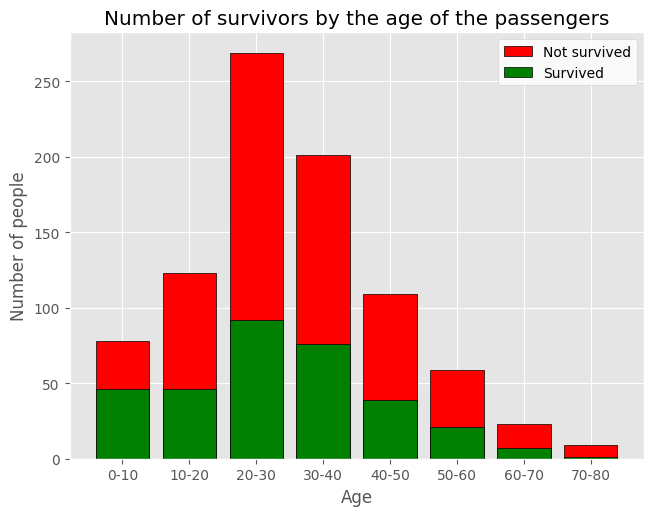

In [ ]:
AgeGroups = data_train['AgeGroup'].value_counts()

function_surv("Age", "Number of people", "AgeGroup", "AgeGroup")

plt.xticks(ticks=[0,1,2,3,4,5,6,7],
           labels=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80'])
plt.title('Number of survivors by the age of the passengers')
plt.show()

Percentage of specific age groups:

<Axes: title={'center': 'Percentage of individual age groups'}, ylabel='AgeGroup'>

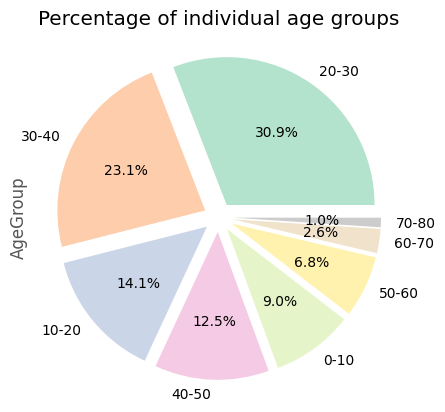

In [ ]:
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)
data_train['AgeGroup'].value_counts().plot(kind ='pie',
                                           title = 'Percentage of individual age groups',
                                           autopct = '%1.1f%%',
                                           colormap   = 'Pastel2',
                                           explode = explode
                                    )

The percentages are calculated without taking into account the 177 nulls. So, for example, the value of 30.9% comes from 220 / 714, not 891, which is the total number of passengers



#### **Fare (il.):**

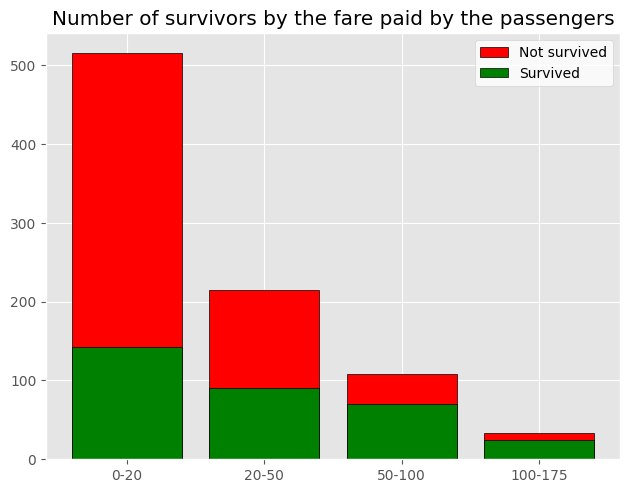

In [ ]:
function_surv("", "", "FareGroup", "FareGroup")

plt.xticks(ticks=[0,1,2,3], labels=['0-20','20-50','50-100','100-175'])
plt.title("Number of survivors by the fare paid by the passengers")
plt.show()

###**Correlations**

The 'Survived' variable is categorical, which means that its correlation can only be tested with categorical variables. <br>
The dependency was tested using the contingency coefficient (or Pearson's c). The formula for calculating this coefficient is as follows: <br>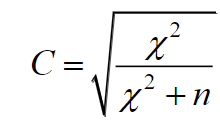<br>
where *n* is the number of observations <br>
Additionally, this coefficient has been adjusted so that its values ​​are in the range of 0 to 1, where higher values ​​mean greater dependence.
Correction formula:<br>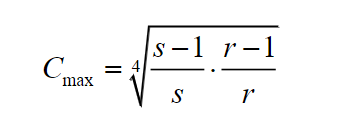<br>
where *s* and *r* are the numbers of categories in the compared variables.

In [ ]:
variable_cat = ['Pclass', 'Sex', 'Embarked', 'Cabin_cat', 'SibSp_cat',
               'Parch_cat', 'AgeGroup', 'FareGroup']

In [ ]:
from scipy.stats import chi2_contingency
corr = [] # an empty list to which we will add the correlation values
for var in variable_cat:
  # the function that calculates chi2 needs a pivot table in the argument
  pivot = data_train.pivot_table(values = 'PassengerId', index = 'Survived',
                               columns = var, aggfunc=lambda x: len(x),
                               margins=True)
  pivot.fillna(0, inplace=True)

  chi2 = chi2_contingency(pivot)[0]
  # c-peorson statistics according to the formula from the Internet
  c_pearson = np.sqrt(chi2/(chi2+len(data_train['PassengerId'])))

  s=len(pivot.index)
  r=len(pivot.columns)
  corection = ((s-1)/s*(r-1)/r)**0.25
  c_pearson_cor = c_pearson/corection

  corr.append(c_pearson_cor) # adding to a list

  print(f'''Survived and {var}\n
Pivot table:\n{pivot}\n
Chi2 stat value: {chi2_contingency(pivot)[0]}
p-value: {chi2_contingency(pivot)[1]}\n\n''')

Survived and Pclass

Pivot table:
Pclass      1    2    3  All
Survived                    
0          74   97  372  543
1         122   87  119  328
All       196  184  491  871

Chi2 stat value: 95.40512008223946
p-value: 2.2766593061331482e-18


Survived and Sex

Pivot table:
Sex       female  male  All
Survived                   
0             81   462  543
1            221   107  328
All          302   569  871

Chi2 stat value: 248.453118488841
p-value: 1.402126709184932e-52


Survived and Embarked

Pivot table:
Embarked    C   Q    S  All
Survived                   
0          72  47  424  543
1          84  30  214  328
All       156  77  638  871

Chi2 stat value: 22.07229214854244
p-value: 0.001174884325280142


Survived and Cabin_cat

Pivot table:
Cabin_cat  0.0  1.0  All
Survived                
0          480   63  543
1          204  124  328
All        684  187  871

Chi2 stat value: 83.26934564168472
p-value: 3.532273088981442e-17


Survived and SibSp_cat

Pivot table:


Correlation with variable 'Survived': 

            Correlations
Pclass         0.373649
Sex            0.576986
Embarked       0.186955
Cabin_cat      0.361787
SibSp_cat      0.142882
Parch_cat      0.172579
AgeGroup       0.170575
FareGroup      0.334310


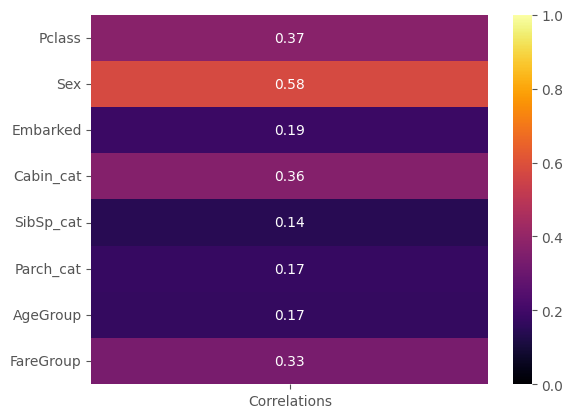

In [ ]:
corr_surv_df = pd.DataFrame(corr, index = variable_cat, columns=['Correlations'])
print("Correlation with variable 'Survived':", '\n\n', corr_surv_df)

heat_map = sns.heatmap(corr_surv_df, annot=True, fmt='.2f', cmap='inferno',
                       vmin=0, vmax=1)
plt.show()

Correlation of quantitative variables:
             Age     SibSp     Parch      Fare
Age    1.000000 -0.181829 -0.153730  0.116759
SibSp -0.181829  1.000000  0.409380  0.246085
Parch -0.153730  0.409380  1.000000  0.230427
Fare   0.116759  0.246085  0.230427  1.000000


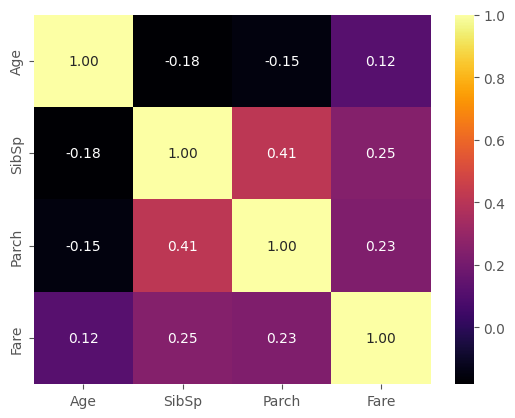

In [ ]:
# Correlation of quantitative variables
df_corr = data_train[['Age', 'SibSp', 'Parch', 'Fare']].dropna().corr()
print("Correlation of quantitative variables:\n", df_corr)

heat_map = sns.heatmap(df_corr, annot=True, fmt='.2f', cmap='inferno')
plt.show()

# **CREATION OF MODELS**

### Data encoding

#### Encoding and standardization of training data

Standardization of quantitative variables

In [ ]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

data_train_for_models = pd.DataFrame(std_scaler.fit_transform(data_train[['Age','Fare']]),
                                      columns=['Age_std', 'Fare_std'])

data_train_for_models.head()

,Age_std,Fare_std
0,-0.528574,-0.657256
1,0.559947,1.525623
2,-0.256444,-0.634246
3,0.355849,0.905759
4,0.355849,-0.629984


Recoding variable 'Sex' to 0-1

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()
y = label_enc.fit_transform(data_train['Sex'])
data_train_for_models['Sex_c'] = y

data_train_for_models.head()

,Age_std,Fare_std,Sex_c
0,-0.528574,-0.657256,1
1,0.559947,1.525623,0
2,-0.256444,-0.634246,0
3,0.355849,0.905759,0
4,0.355849,-0.629984,1


Recoding variable 'Pclass' to 0-1

In [ ]:
from sklearn.preprocessing import OneHotEncoder

oh_enc = OneHotEncoder()
oh_enc.fit(pd.DataFrame(data_train['Pclass']))

data_train_for_models['Pclass_c1'] = oh_enc.transform(
    pd.DataFrame(data_train['Pclass'])).toarray()[:, 0]
data_train_for_models['Pclass_c2'] = oh_enc.transform(
    pd.DataFrame(data_train['Pclass'])).toarray()[:, 1]
data_train_for_models['Pclass_c3'] = oh_enc.transform(
    pd.DataFrame(data_train['Pclass'])).toarray()[:, 2]

data_train_for_models.head()

,Age_std,Fare_std,Sex_c,Pclass_c1,Pclass_c2,Pclass_c3
0,-0.528574,-0.657256,1,0.0,0.0,1.0
1,0.559947,1.525623,0,1.0,0.0,0.0
2,-0.256444,-0.634246,0,0.0,0.0,1.0
3,0.355849,0.905759,0,1.0,0.0,0.0
4,0.355849,-0.629984,1,0.0,0.0,1.0


Recoding variable 'Embarked' to 0-1

In [ ]:
oh_enc.fit(pd.DataFrame(data_train['Embarked']))

data_train_for_models['Embarked_S'] = oh_enc.transform(
    pd.DataFrame(data_train['Embarked'])).toarray()[:, 0]
data_train_for_models['Embarked_C'] = oh_enc.transform(
    pd.DataFrame(data_train['Embarked'])).toarray()[:, 1]
data_train_for_models['Embarked_Q'] = oh_enc.transform(
    pd.DataFrame(data_train['Embarked'])).toarray()[:, 2]

data_train_for_models.head()

,Age_std,Fare_std,Sex_c,Pclass_c1,Pclass_c2,Pclass_c3,Embarked_S,Embarked_C,Embarked_Q
0,-0.528574,-0.657256,1,0.0,0.0,1.0,0.0,0.0,1.0
1,0.559947,1.525623,0,1.0,0.0,0.0,1.0,0.0,0.0
2,-0.256444,-0.634246,0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.355849,0.905759,0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.355849,-0.629984,1,0.0,0.0,1.0,0.0,0.0,1.0


Changing the type for the remaining categorical variables that are already coded as 0-1

In [ ]:
for i in ['Cabin_cat', 'SibSp_cat', 'Parch_cat']:
    data_train_for_models[i] = data_train[i].astype(
        'int').reset_index(drop=True)
data_train_for_models

,Age_std,Fare_std,Sex_c,Pclass_c1,Pclass_c2,Pclass_c3,Embarked_S,Embarked_C,Embarked_Q,Cabin_cat,SibSp_cat,Parch_cat
0,-0.528574,-0.657256,1,0.0,0.0,1.0,0.0,0.0,1.0,0,1,0
1,0.559947,1.525623,0,1.0,0.0,0.0,1.0,0.0,0.0,1,1,0
2,-0.256444,-0.634246,0,0.0,0.0,1.0,0.0,0.0,1.0,0,0,0
3,0.355849,0.905759,0,1.0,0.0,0.0,0.0,0.0,1.0,1,1,0
4,0.355849,-0.629984,1,0.0,0.0,1.0,0.0,0.0,1.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
866,2.396825,-0.657965,1,0.0,0.0,1.0,1.0,0.0,0.0,0,0,0
867,2.396825,1.466535,0,0.0,0.0,1.0,0.0,0.0,1.0,0,1,1
868,2.396825,-0.580554,1,0.0,0.0,1.0,0.0,0.0,1.0,0,0,0
869,3.077150,-0.635241,1,0.0,0.0,1.0,0.0,0.0,1.0,0,0,0


#### Encoding and standardization of test data

Standardization of quantitative variables

In [ ]:
data_test_for_models = pd.DataFrame(std_scaler.transform(data_test[['Age', 'Fare']]), columns=['Age_std', 'Fare_std'])

data_test_for_models.head()

,Age_std,Fare_std
0,0.321833,-0.637511
1,1.172240,-0.665779
2,2.192727,-0.574162
3,-0.188411,-0.609104
4,-0.528574,-0.485529


Recoding variable 'Sex' to 0-1

In [ ]:
y = label_enc.transform(data_test['Sex'])
data_test_for_models['Sex_c'] = y

data_test_for_models.head()

,Age_std,Fare_std,Sex_c
0,0.321833,-0.637511,1
1,1.172240,-0.665779,0
2,2.192727,-0.574162,1
3,-0.188411,-0.609104,1
4,-0.528574,-0.485529,0


Recoding variable 'Pclass' to 0-1

In [ ]:
oh_enc.fit(pd.DataFrame(data_train['Pclass']))

data_test_for_models['Pclass_c1'] = oh_enc.transform(pd.DataFrame(data_test['Pclass'])).toarray()[:, 0]
data_test_for_models['Pclass_c2'] = oh_enc.transform(pd.DataFrame(data_test['Pclass'])).toarray()[:, 1]
data_test_for_models['Pclass_c3'] = oh_enc.transform(pd.DataFrame(data_test['Pclass'])).toarray()[:, 2]

data_test_for_models.head()

,Age_std,Fare_std,Sex_c,Pclass_c1,Pclass_c2,Pclass_c3
0,0.321833,-0.637511,1,0.0,0.0,1.0
1,1.172240,-0.665779,0,0.0,0.0,1.0
2,2.192727,-0.574162,1,0.0,1.0,0.0
3,-0.188411,-0.609104,1,0.0,0.0,1.0
4,-0.528574,-0.485529,0,0.0,0.0,1.0


Recoding variable 'Embarked' to 0-1

In [ ]:
oh_enc.fit(pd.DataFrame(data_train['Embarked']))

data_test_for_models['Embarked_S'] = oh_enc.transform(
    pd.DataFrame(data_test['Embarked'])).toarray()[:, 0]
data_test_for_models['Embarked_C'] = oh_enc.transform(
    pd.DataFrame(data_test['Embarked'])).toarray()[:, 1]
data_test_for_models['Embarked_Q'] = oh_enc.transform(
    pd.DataFrame(data_test['Embarked'])).toarray()[:, 2]

data_test_for_models.head()

,Age_std,Fare_std,Sex_c,Pclass_c1,Pclass_c2,Pclass_c3,Embarked_S,Embarked_C,Embarked_Q
0,0.321833,-0.637511,1,0.0,0.0,1.0,0.0,1.0,0.0
1,1.172240,-0.665779,0,0.0,0.0,1.0,0.0,0.0,1.0
2,2.192727,-0.574162,1,0.0,1.0,0.0,0.0,1.0,0.0
3,-0.188411,-0.609104,1,0.0,0.0,1.0,0.0,0.0,1.0
4,-0.528574,-0.485529,0,0.0,0.0,1.0,0.0,0.0,1.0


Change the type for the remaining categorical variables that are already coded as 0-1

In [ ]:
for i in ['Cabin_cat', 'SibSp_cat', 'Parch_cat']:
    data_test_for_models[i] = data_test[i].astype(
        'int').reset_index(drop=True)
data_test_for_models.head()

,Age_std,Fare_std,Sex_c,Pclass_c1,Pclass_c2,Pclass_c3,Embarked_S,Embarked_C,Embarked_Q,Cabin_cat,SibSp_cat,Parch_cat
0,0.321833,-0.637511,1,0.0,0.0,1.0,0.0,1.0,0.0,0,0,0
1,1.172240,-0.665779,0,0.0,0.0,1.0,0.0,0.0,1.0,0,1,0
2,2.192727,-0.574162,1,0.0,1.0,0.0,0.0,1.0,0.0,0,0,0
3,-0.188411,-0.609104,1,0.0,0.0,1.0,0.0,0.0,1.0,0,0,0
4,-0.528574,-0.485529,0,0.0,0.0,1.0,0.0,0.0,1.0,0,1,1


'Survived' variable for test data

In [ ]:
data_test_sur = pd.read_csv('gender_submission.csv')
data_test_sur['Survived']

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

## **Logistic Regression**

### Functions

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression

In [ ]:
# a function that displays information about the model with the entered variables
# the information includes the level of fit of the model to training and test data,
# the coefficients and the constant value of the model, and the matrix of fitting
# the predicted data to the test data
def data_reg_log(variables):
    # creating a model
    log_reg = LogisticRegression(random_state=0, class_weight='balanced')
    log_reg.fit(data_train_for_models[variables], data_train['Survived'])

    # prediction for test data
    test_pred = log_reg.predict(data_test_for_models[variables])

    # theoretical values ​​for training data
    train_pred = log_reg.predict(data_train_for_models[variables])

    # basic indicators
    print("Fitting to the model: ", accuracy_score(
        data_train['Survived'], train_pred))
    print("Fitting to the test data: ", accuracy_score(
        data_test_sur['Survived'], test_pred))
    print("Coefficients:", pd.DataFrame(log_reg.coef_.reshape(
        len(log_reg.coef_[0]), 1), index=data_train_for_models[variables].columns), "\nConstant value:", log_reg.intercept_[0])
    print(pd.DataFrame(confusion_matrix(data_test_sur['Survived'], test_pred), columns=[
        'Pred_d', 'Pred_surv'], index=['Dead',  'Survived']))

    # probabilities for each observation
    result = pd.DataFrame(log_reg.predict_proba(
        data_test_for_models[variables]))
    result['Class'] = test_pred
    result.sort_values(0)

In [ ]:
# a function that compares models against the following information
# the level of the fit of the model to training and test data,
# average level of probability of assigning observations to their classes (died or survived)
# and the rate of added observance (to assess whether it is significant)
def comp_reg_log(variables):

    # function, when the model is calculated for only one variable
    if variables is None:
        # creating an empty data frame that we will fill with data for comparison
        traf = pd.DataFrame(
            columns=['Var_1', 'Accuracy', 'Fit', 'Avg_probab_to_die', 'Avg_probab_to_survive', 'Col', 'coef_of_new_var'])

        # data to compare models
        for i in data_train_for_models.columns:
            # creating the model
            log_reg = LogisticRegression(random_state=0, class_weight='balanced')
            log_reg.fit(data_train_for_models[[i]], data_train['Survived'])

            # prediction for test data
            test_pred = log_reg.predict(data_test_for_models[[i]])

            # theoretical values ​​for training data
            train_pred = log_reg.predict(data_train_for_models[[i]])

            # rates to compare
            ac_sc_test = accuracy_score(data_test_sur['Survived'], test_pred)
            ac_sc_train = accuracy_score(data_train['Survived'], train_pred)

            prob = pd.DataFrame(log_reg.predict_proba(data_test_for_models[[i]]))
            # the average probability with which we include the observations in the group of people who died
            avg_prob_die = np.mean(prob[prob[0] > 0.5][0])
            # the average probability with which we include the observations in the group of people who survived
            avg_prob_surv = np.mean(prob[prob[1] > 0.5][1])
            # the total of these probabilities (needed for sorting),
            # the greater this value, the more we are sure that the person belongs to this group and not another
            sum_prob = avg_prob_die+avg_prob_surv

            traf.loc[len(traf)] = [i, ac_sc_test, ac_sc_train, avg_prob_die,
                                    avg_prob_surv, sum_prob, log_reg.coef_[-1][-1]]

        # we sort by the average 'confidence' of assigning observations to groups
        print(traf.sort_values('Col', ascending=False))

    # function for a model with two or more variables
    else:
        # creating a list of columns for dataframe
        col_list = []
        col_list.append('Var_1')
        var_nr = 2
        for i in variables:
            col_list.append(f'Var_{var_nr}')
            var_nr = var_nr+1
        for i in ['Accuracy', 'Fit', 'Avg_probab_to_die', 'Avg_probab_to_survive', 'Col', 'Coef_of_new_var']:
            col_list.append(i)

        # creating an empty data frame that we will fill with data for comparison
        traf_2 = pd.DataFrame(columns=col_list)

        # list of variables to be added to the model without previously selected variables
        var = list(data_train_for_models.columns)
        for i in variables:
            var.remove(i)

        # data to compare models
        for i in var:
            # creating a list of variables for the model, combining previously indicated variables with one additional
            zm_por = list(np.copy(variables))
            zm_por.append(i)
            # creating a model
            log_reg = LogisticRegression(random_state=0, class_weight='balanced')
            log_reg.fit(data_train_for_models[zm_por], data_train['Survived'])

            # prediction for test data
            test_pred = log_reg.predict(data_test_for_models[zm_por])

            # theoretical values ​​for training data
            train_pred = log_reg.predict(data_train_for_models[zm_por])

            # rates to compare
            ac_sc_test = accuracy_score(data_test_sur['Survived'], test_pred)
            ac_sc_train = accuracy_score(data_train['Survived'], train_pred)

            prob = pd.DataFrame(log_reg.predict_proba(
                pd.DataFrame(data_test_for_models[zm_por])))
            # the average probability with which we include the observations in the group of people who died
            avg_prob_die = np.mean(prob[prob[0] > 0.5][0])
            # the average probability with which we include the observations in the group of people who survived
            avg_prob_surv = np.mean(prob[prob[1] > 0.5][1])
            #the total of these probabilities (needed for sorting),
            # the greater this value, the more we are sure that the person belongs to this group and not another
            sum_prob = avg_prob_die+avg_prob_surv

            for i in [ac_sc_test, ac_sc_train, avg_prob_die, avg_prob_surv, sum_prob, log_reg.coef_[-1][-1]]:
                zm_por.append(i)

            traf_2.loc[len(traf_2)] = zm_por
        # we sort by the degree of average 'confidence' of assigning observations to groups
        print(traf_2.sort_values('Col', ascending=False))

### Model with all variables

In [ ]:
data_reg_log(data_train_for_models.columns)

Fitting to the model:  0.7921928817451206
Fitting to the test data:  0.5167464114832536
Coefficients:                    0
Age_std    -0.480313
Fare_std    0.068328
Sex_c      -2.396084
Pclass_c1   0.536965
Pclass_c2   0.262318
Pclass_c3  -0.798764
Embarked_S  0.223530
Embarked_C  0.086901
Embarked_Q -0.309912
Cabin_cat   0.950706
SibSp_cat  -0.137227
Parch_cat  -0.059192 
Constant value: 1.688685580102028
          Pred_d  Pred_surv
Dead         146        120
Survived      82         70


**Conclusion**: model cannot be considered to be good. The fit is very small and there are many unimportant variables.
Such a large difference between the fit to the training data and the test data suggest an overestimation of the model. <br>
It was decided to add variables to the model one by one in order to observe how its basic characteristics change. <br>
During adding variables to the model, attention was paid not only to the level of fit to the training data, but also to the test data to avoid overestimation.

### Models with one variable

In [ ]:
comp_reg_log(None)

         Var_1  Accuracy       Fit  Avg_probab_to_die  Avg_probab_to_survive  \
2        Sex_c  0.559809  0.784156           0.718170               0.812043   
9    Cabin_cat  0.581340  0.693456           0.584733               0.758268   
5    Pclass_c3  0.497608  0.667049           0.650897               0.666076   
3    Pclass_c1  0.571770  0.678530           0.577012               0.726053   
1     Fare_std  0.564593  0.645235           0.582409               0.718716   
6   Embarked_S  0.578947  0.637199           0.537201               0.654220   
11   Parch_cat  0.559809  0.624569           0.540031               0.622668   
8   Embarked_Q  0.540670  0.617681           0.543792               0.610755   
10   SibSp_cat  0.571770  0.598163           0.541275               0.583499   
4    Pclass_c2  0.562201  0.611940           0.527100               0.595005   
0      Age_std  0.490431  0.506315           0.545519               0.531654   
7   Embarked_C  0.598086  0.603904      

As the first variable added, 'Sex_c' is the best fit because it is significant. The fit of the model with this variable is the greatest, and the fit to the test data is one of the highest

In [ ]:
data_reg_log(['Sex_c'])

Fitting to the model:  0.7841561423650976
Fitting to the test data:  0.5598086124401914
Coefficients:               0
Sex_c -2.398746 
Constant value: 1.4633421032117346
          Pred_d  Pred_surv
Dead         174         92
Survived      92         60


**Conclusion**:The added variable is significant. The fit of the model to the test data is slightly worse, while the prediction is noticeably better.

### Models with two variables

In [ ]:
comp_reg_log(['Sex_c'])

    Var_1       Var_2  Accuracy       Fit  Avg_probab_to_die  \
1   Sex_c    Fare_std  0.562201  0.774971           0.742879   
8   Sex_c   Cabin_cat  0.533493  0.768083           0.788495   
10  Sex_c   Parch_cat  0.559809  0.784156           0.718712   
9   Sex_c   SibSp_cat  0.559809  0.784156           0.717952   
6   Sex_c  Embarked_C  0.559809  0.784156           0.719181   
2   Sex_c   Pclass_c1  0.514354  0.752009           0.789432   
7   Sex_c  Embarked_Q  0.559809  0.784156           0.710370   
0   Sex_c     Age_std  0.559809  0.784156           0.718326   
3   Sex_c   Pclass_c2  0.559809  0.784156           0.714673   
5   Sex_c  Embarked_S  0.559809  0.784156           0.706921   
4   Sex_c   Pclass_c3  0.559809  0.784156           0.706852   

    Avg_probab_to_survive       Col  Coef_of_new_var  
1                0.802599  1.545478         0.569182  
8                0.749698  1.538193         1.567468  
10               0.811815  1.530527         0.188263  
9          

'Fare_std' was added to the model as a second explanatory variable. Its addition results in the best fit of the model to the test data and one of the best fit to the training data

In [ ]:
data_reg_log(['Sex_c', 'Fare_std'])

Fitting to the model:  0.7749712973593571
Fitting to the test data:  0.562200956937799
Coefficients:                  0
Sex_c    -2.287636
Fare_std  0.569182 
Constant value: 1.3928449534549976
          Pred_d  Pred_surv
Dead         163        103
Survived      80         72


**Conclusion:** DThe added variable is significant and improves the fit of the model to the test data, while the fit to the training data deteriorated a bit again.

### Models with three variables

In [ ]:
comp_reg_log(['Sex_c', 'Fare_std'])

   Var_1     Var_2       Var_3  Accuracy       Fit  Avg_probab_to_die  \
7  Sex_c  Fare_std   Cabin_cat  0.538278  0.774971           0.777731   
8  Sex_c  Fare_std   SibSp_cat  0.557416  0.777268           0.743527   
6  Sex_c  Fare_std  Embarked_Q  0.564593  0.783008           0.740198   
0  Sex_c  Fare_std     Age_std  0.555024  0.771527           0.742557   
9  Sex_c  Fare_std   Parch_cat  0.564593  0.774971           0.743548   
5  Sex_c  Fare_std  Embarked_C  0.562201  0.774971           0.742977   
4  Sex_c  Fare_std  Embarked_S  0.559809  0.785304           0.739763   
1  Sex_c  Fare_std   Pclass_c1  0.545455  0.768083           0.763734   
2  Sex_c  Fare_std   Pclass_c2  0.555024  0.774971           0.736790   
3  Sex_c  Fare_std   Pclass_c3  0.559809  0.772675           0.735851   

   Avg_probab_to_survive       Col  Coef_of_new_var  
7               0.774417  1.552147         1.286110  
8               0.804023  1.547550        -0.281224  
6               0.805779  1.545977

The third variable added to the model was 'Embarked_Q'. Adding this variable, and not another, results in the best fit to both training and testing data.

In [ ]:
data_reg_log(['Sex_c', 'Fare_std', 'Embarked_Q'])

Fitting to the model:  0.78300803673938
Fitting to the test data:  0.5645933014354066
Coefficients:                    0
Sex_c      -2.264440
Fare_std    0.555537
Embarked_Q -0.381592 
Constant value: 1.6536007912601218
          Pred_d  Pred_surv
Dead         163        103
Survived      79         73


**Wniosek:** dodana zmienna polepszyła dopasowanie zarówno do danych treningowych jak i testowych

### Models with four variables

In [ ]:
comp_reg_log(['Sex_c', 'Fare_std', 'Embarked_Q'])

   Var_1     Var_2       Var_3       Var_4  Accuracy       Fit  \
6  Sex_c  Fare_std  Embarked_Q   Cabin_cat  0.535885  0.769231   
7  Sex_c  Fare_std  Embarked_Q   SibSp_cat  0.557416  0.779564   
1  Sex_c  Fare_std  Embarked_Q   Pclass_c1  0.535885  0.768083   
8  Sex_c  Fare_std  Embarked_Q   Parch_cat  0.564593  0.784156   
4  Sex_c  Fare_std  Embarked_Q  Embarked_S  0.559809  0.785304   
5  Sex_c  Fare_std  Embarked_Q  Embarked_C  0.559809  0.785304   
0  Sex_c  Fare_std  Embarked_Q     Age_std  0.550239  0.781860   
2  Sex_c  Fare_std  Embarked_Q   Pclass_c2  0.555024  0.776119   
3  Sex_c  Fare_std  Embarked_Q   Pclass_c3  0.543062  0.774971   

   Avg_probab_to_die  Avg_probab_to_survive       Col  Coef_of_new_var  
6           0.774615               0.783398  1.558012         1.278345  
7           0.739691               0.808181  1.547872        -0.262428  
1           0.764446               0.782363  1.546809         1.138922  
8           0.739939               0.806034  1.

The only variable that, when added, does not result in a decrease in fit to test data is 'Parch_cat'. Once added, the variable is not really important.

In [ ]:
data_reg_log(['Sex_c', 'Fare_std', 'Embarked_Q', 'Parch_cat'])

Fitting to the model:  0.7841561423650976
Fitting to the test data:  0.5645933014354066
Coefficients:                    0
Sex_c      -2.277726
Fare_std    0.565317
Embarked_Q -0.376458
Parch_cat  -0.074780 
Constant value: 1.677235377330264
          Pred_d  Pred_surv
Dead         163        103
Survived      79         73


**Conclusion:**
As a result of low significance, the variable did not affect the prediction, but slightly improved the fit to the test data <br>
Due to the fact that adding more variables does not improve the prediction, it was decided not to add new variables to avoid overestimation of the model.

### Comparison of logistic regressions

In [ ]:
print('Data from one variable model:\n')
data_reg_log(['Sex_c'])
print('\nData from two variables model:\n')
data_reg_log(['Sex_c', 'Fare_std'])
print('\nData from three variables model:\n')
data_reg_log(['Sex_c', 'Fare_std', 'Embarked_Q'])
print('\nData from four variables model:\n')
data_reg_log(['Sex_c', 'Fare_std', 'Embarked_Q', 'Parch_cat'])

Data from one variable model:

Fitting to the model:  0.7841561423650976
Fitting to the test data:  0.5598086124401914
Coefficients:               0
Sex_c -2.398746 
Constant value: 1.4633421032117346
          Pred_d  Pred_surv
Dead         174         92
Survived      92         60

Data from two variables model:

Fitting to the model:  0.7749712973593571
Fitting to the test data:  0.562200956937799
Coefficients:                  0
Sex_c    -2.287636
Fare_std  0.569182 
Constant value: 1.3928449534549976
          Pred_d  Pred_surv
Dead         163        103
Survived      80         72

Data from three variables model:

Fitting to the model:  0.78300803673938
Fitting to the test data:  0.5645933014354066
Coefficients:                    0
Sex_c      -2.264440
Fare_std    0.555537
Embarked_Q -0.381592 
Constant value: 1.6536007912601218
          Pred_d  Pred_surv
Dead         163        103
Survived      79         73

Data from four variables model:

Fitting to the model:  0.784156

**Conclusion:** The two-variable model is the best. Additional variables do not affect the prediction very much because they turn out to be of little importance. For example, the prediction of models with two and three variables differ in only one observation.

##**Random Forest**

### Model with default arguments

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF_Model = RandomForestClassifier(n_estimators=200)

RF_Model.fit(data_train_for_models,data_train['Survived']) # X_train, Y_train

RandomForestClassifier(n_estimators=200)

In [ ]:
y_train_pred = RF_Model.predict(data_train_for_models)
y_test_pred = RF_Model.predict(data_test_for_models)

In [ ]:
print("Fitting to the model: ", accuracy_score(
        data_train['Survived'], y_train_pred))
print("Fitting to the test data: ", accuracy_score(data_test_sur['Survived'], y_test_pred))
print(pd.DataFrame(confusion_matrix(data_test_sur['Survived'], y_test_pred), columns=[
        'Pred_d', 'Pred_surv'], index=['Dead',  'Survived']))

Fitting to the model:  0.9896670493685419
Fitting to the test data:  0.5191387559808612
          Pred_d  Pred_surv
Dead         163        103
Survived      98         54


### Model with selected arguments

In [ ]:
from sklearn.model_selection import GridSearchCV

para = { 'n_estimators' : [400,450,500,550]
       , 'criterion' : ['gini','entropy']
       , 'max_depth' : [15, 20, 25]
       , 'min_samples_split' : [2,3]}

In [ ]:
RF_grid = GridSearchCV(RF_Model, param_grid = para, cv = 3, verbose = True, n_jobs = -1)

RF_grid_model = RF_grid.fit(data_train_for_models,data_train['Survived'])

Fitting 3 folds for each of 48 candidates, totalling 144 fits


In [ ]:
RF_grid_model.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_split=3,
                       n_estimators=400)

In [ ]:
RF_grid_model.best_score_

0.796804518702848

In [ ]:
Best_Model = RandomForestClassifier(criterion='entropy', max_depth=7, min_samples_split=4,
                       n_estimators=50, n_jobs=-1)

Best_Model.fit(data_train_for_models,data_train['Survived'])

y_train_pred = Best_Model.predict(data_train_for_models)
y_test_pred = Best_Model.predict(data_test_for_models)

In [ ]:
print("Fitting to the model: ", accuracy_score(
        data_train['Survived'], y_train_pred))
print("Fitting to the test data: ", accuracy_score(data_test_sur['Survived'], y_test_pred))
print(pd.DataFrame(confusion_matrix(data_test_sur['Survived'], y_test_pred), columns=[
        'Pred_d', 'Pred_surv'], index=['Dead',  'Survived']))

Fitting to the model:  0.8851894374282434
Fitting to the test data:  0.5334928229665071
          Pred_d  Pred_surv
Dead         173         93
Survived     102         50


##**KNN**

### Model with default arguments

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics


knn = KNeighborsClassifier()

# train
knn.fit(data_train_for_models, data_train['Survived'])

y_train_pred = knn.predict(data_train_for_models)

print(metrics.classification_report(data_train['Survived'], y_train_pred))

pd.DataFrame(confusion_matrix(data_train['Survived'], y_train_pred), columns=[
        'Pred_d', 'Pred_surv'], index=['Dead',  'Survived'])





              precision    recall  f1-score   support

           0       0.88      0.90      0.89       543
           1       0.83      0.80      0.81       328

    accuracy                           0.86       871
   macro avg       0.86      0.85      0.85       871
weighted avg       0.86      0.86      0.86       871



,Pred_d,Pred_surv
Dead,490,53
Survived,67,261


In [ ]:
# test

y_test_pred = knn.predict(data_test_for_models)



print(metrics.classification_report(data_test_sur['Survived'], y_test_pred))

pd.DataFrame(confusion_matrix(data_test_sur['Survived'], y_test_pred), columns=[
        'Pred_d', 'Pred_surv'], index=['Dead',  'Survived'])


              precision    recall  f1-score   support

           0       0.64      0.62      0.63       266
           1       0.36      0.38      0.37       152

    accuracy                           0.53       418
   macro avg       0.50      0.50      0.50       418
weighted avg       0.54      0.53      0.54       418



,Pred_d,Pred_surv
Dead,165,101
Survived,94,58


In [ ]:
print("Fitting to the model: ", accuracy_score(
        data_train['Survived'], y_train_pred))
print("Fitting to test data: ",
      accuracy_score(data_test_sur['Survived'], y_test_pred))


Fitting to the model:  0.8622273249138921
Fitting to test data:  0.5334928229665071


### Modified model

In [ ]:
#MODIFICATION, KNN ONLY

i = 1
while i<16:
  knn_model = KNeighborsClassifier(n_neighbors=i, p = 1)

  #train
  knn_model.fit(data_train_for_models, data_train['Survived'])
  y_train_pred = knn_model.predict(data_train_for_models)

  print("Fitting to the ", i," model: ", accuracy_score(data_train['Survived'],
                                                  y_train_pred))

  #test
  y_test = knn_model.predict(data_test_for_models)
  print("Fitting to the test data ", i,": ",
        accuracy_score(data_test_sur['Survived'], y_test))
  print( )
  i+= 1

#the lower number the better fit to the model
#the best fit to the test data is for the 2 nearest neighbors




Fitting to the  1  model:  0.9873708381171068
Fitting to the test data  1 :  0.5

Fitting to the  2  model:  0.8771526980482205
Fitting to the test data  2 :  0.5813397129186603

Fitting to the  3  model:  0.8748564867967853
Fitting to the test data  3 :  0.5406698564593302

Fitting to the  4  model:  0.8599311136624569
Fitting to the test data  4 :  0.5574162679425837

Fitting to the  5  model:  0.8599311136624569
Fitting to the test data  5 :  0.5311004784688995

Fitting to the  6  model:  0.851894374282434
Fitting to the test data  6 :  0.5526315789473685

Fitting to the  7  model:  0.8415614236509759
Fitting to the test data  7 :  0.5287081339712919

Fitting to the  8  model:  0.8392652123995408
Fitting to the test data  8 :  0.5574162679425837

Fitting to the  9  model:  0.8473019517795637
Fitting to the test data  9 :  0.5502392344497608

Fitting to the  10  model:  0.8312284730195177
Fitting to the test data  10 :  0.5574162679425837

Fitting to the  11  model:  0.83696900114810

In [ ]:
#MODIFICATION, DIFFERENT PARAMETERS

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier


param_grid = {
    'n_neighbors': [2, 3, 4, 5, 6, 7],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree'],
    'p': [1, 2]
}


grid_search = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=5)
grid_search.fit(data_train_for_models, data_train['Survived'])

best_estimator = grid_search.best_estimator_
print(best_estimator)

best_estimator.fit(data_train_for_models, data_train['Survived'])
y_train_pred = best_estimator.predict(data_train_for_models)
y_test_pred = best_estimator.predict(data_test_for_models)


print("Fitting to the model (training):", accuracy_score(data_train['Survived'], y_train_pred))
print("Fitting to the model (test):", accuracy_score(data_test_sur['Survived'], y_test_pred))

KNeighborsClassifier(n_neighbors=6, p=1)
Fitting to the model (training): 0.851894374282434
Fitting to the model (test): 0.5526315789473685


#**MODEL COMPARISON**

---



Several models were created and compared for each method.
The best model created using logistic regression predicted 56.46% of the observations, Random Forest - 54.78% and (KNN) - 58.13%.<br>
All models showed a very good fit to the training data, which indicates an overestimation.


In [ ]:
# Submission file
submission_df = pd.DataFrame({
    'PassengerId': data_test['PassengerId'],
    'Survived': y_test_pred
})

submission_df.to_csv('submission.csv', index=False)